# Python: Librerie Scientifiche: SciPy e Pandas

Questo notebook è stato scritto da Agostino Migliore apportando variazioni (sostanziali soprattutto per quanto riguarda la sezione su *Pandas*) e aggiunte a un notebook di:

* Simone Campagna (CINECA)
* Mirko Cestari (CINECA)
* Nicola Spallanzani (CNR-NANO)

# SciPy

<span style="color:red">SciPy</span> contiene pacchetti in cui sono definiti algoritmi e classi inerenti alle tematiche scientifiche elencate nella tabella di sotto. Esso poggia su NumPy e fornisce algoritmi scientifici di più alto livello rispetto a quest'ultimo.

|__argomento__|__pacchetto di SciPy__|
|-|-|
|funzioni speciali|[scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html)|
|integrazione|[scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html)|
|ottimizzazione|[scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html)|
|interpolazione|[scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html)|
|trasformate di Fourier|[scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html)|
|elaborazione di segnali|[scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html)|
|algebra lineare|[scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html)|
|problemi agli autovalori sparsi|[scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html)|
|statistica|[scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html)|
|elaborazione di immagini multidimensionali|[scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html)|
|I/O di file|[scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html)|

Si può, chiaramente, importare tutto il contenuto di Scipy con la linea di comando

`from scipy import *`

Può essere conveniente importare solo il pacchetto di interesse per risolvere un certo problema scientifico. Per esempio, se siamo interessati alla soluzione di un sistema di equazioni lineari, possiamo eseguire

`from scipy import linalg as la`

oppure

`import scipy.linalg as la`

Quasi tutte le funzioni di SciPy accettano arrays di NumPy (cioè ndarrays), nonché singoli numeri, come argomenti. In termini tecnici, tali funzioni sono, in effetti, funzioni universali di NumPy, anche se sono contenute nel pacchetto SciPy. Le funzioni che non accettano arrays di NumPy come argomenti contengono una nota a riguardo nella sezione descrittiva.

## Algebra lineare con Scipy

Adesso usiamo SciPy per risolvere l'equazione matriciale lineare (ovvero il sistema di equazioni lineari corrispondenti)

`A x = b`

in cui `A` è una matrice mentre `x` e `b` sono vettori colonna. `A` e `b` sono assegnati da noi, mentre gli elementi di `x` sono le incognite.  
Innanzitutto, importiamo NumPy per poter costruire le arrays di interesse e il modulo <span style="color:red">scipy.linalg</span> per risolvere il problema di algebra lineare:

In [1]:
import numpy as np
import scipy.linalg as la

Ora possiamo definire `A` e `b`:

In [2]:
A = np.array([[1,2,3], [4,5,6], [17,8,9]])
b = np.array([10,11,12])

Eseguendo `help(la)`, vediamo che, tra le funzioni fondamentali tale pacchetto contiene la funzione `solve`, che consente di risolvere sistemi lineari. Infatti,

In [3]:
print(la.solve.__doc__.split("\n")[1])

    Solves the linear equation set ``a @ x == b`` for the unknown ``x``


Si noti che, nell'istruazione di sopra, abbiamo usato `__doc__`, un attributo speciale di cui sono dotati moduli, classi, funzioni e metodi, che riporta la loro stringa di documentazione. Inoltre, abbiamo usato il metodo `split()` col separatore `sep='\n'` per scindere il contenuto della documentazione in righe e `[1]` per estrarne la prima riga soltanto. Da `help(la.solve)` vediamo pure che la sintassi della funzione è

`solve(a, b, ...)`

Eseguiamo, quindi,

In [4]:
x = la.solve(A, b)
print(x)

[ 0.         -9.          9.33333333]


Il risultato è ovviamente corretto; tuttavia, se volessimo verificarlo, potremmo sfruttrare la funzione `dot` di NumPy vista precedentemente:

In [5]:
np.dot(A, x) - b

array([0., 0., 0.])

Tra le altre funzioni di `scipy.linalg` menzioniamo, per esempio, <span style="color:blue">det</span>, che calcola il determinante di una matrice:

In [6]:
la.det(A)

-30.000000000000007

e <span style="color:blue">inv</span>, che ne calcola l'inversa:

In [7]:
la.inv(A)

array([[ 0.1       , -0.2       ,  0.1       ],
       [-2.2       ,  1.4       , -0.2       ],
       [ 1.76666667, -0.86666667,  0.1       ]])

<br>

## Ricerca di minimi con funzioni di SciPy

Infine, facciamo un esempio di ricerca di minimi con SciPy. A tal fine, usiamo il sotto-pacchetto <span style="color:red">optimize</span> di SciPy, che fornisce funzioni per minimizzare o massimizzare una data funzione (scalare) di una singola variabile, $f(x)$, chiamata la <span style="color:blue">funzione obiettivo</span> (*<span style="color:blue">objective function</span>*). Si noti che minimizzare $f(x)$ significa trovare il valore $x_{min}$ della variabile indipendente $x$ che rende la funzione minima, cioè il suo punto di minimo.

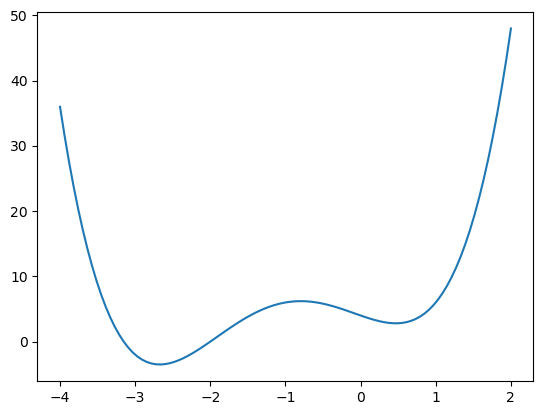

In [8]:
from  scipy import optimize
import matplotlib.pyplot as plt
def f(x):
    return 4*x**3 + (x-2)**2 + x**4
fig, ax = plt.subplots()
x = np.linspace(-4,2,100)
ax.plot(x, f(x));

Vogliamo trovare, per esempio, il punto di minimo della funzione più vicino a un dato punto $x_0$. A tal fine, usiamo la funzione `fmin_bfgs` di SciPy, che ha la sintassi

`fmin_bfgs(f, x0, ...)`

dove, chiaramente, `f` è la funzione e `x0` è il punto di partenza. Tale funzione usa l'algoritmo di Broyden–Fletcher–Goldfarb–Shanno (BFGS) per minimizzare `f`. Nella documentazione di SciPy `x0` è definitio come la *initial guess* (la congettura iniziale). Infatti, possiamo dare uno sguardo al grafico della funzione, fornire un valore di input per `x0` nei dintorni del punto di minimo di interesse e trovare il valore di quest'ultimo. Per esempio, troviamo il punto di minimo a sinistra con

In [9]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 5
         Function evaluations: 16
         Gradient evaluations: 8


array([-2.6729815])

e quello a destra con

In [10]:
optimize.fmin_bfgs(f, 0)

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 4
         Function evaluations: 14
         Gradient evaluations: 7


array([0.46961736])

<br>

# Pandas

<span style="color:red">Pandas</span> è uno strumento di analisi e manipolazione dei dati veloce e flessibile basato sul linguaggio Python.  
Pandas fornisce due tipi (classi) di strutture per la gestione dei dati: *Series* e *DataFrame*.

## Series

Una <span style="color:red">Series</span> è una array unidimensionale di dati che possono essere di qualsiasi tipo: intero, stringa, ecc. I dati sono presentati in colonna ed etichettati (di default, con numeri interi crescenti). La sintassi per creare un oggetto di tale classe è

`pd.Series(data=None, index=None, dtype=None, name=None, copy=False, ...)`

Per esempio:

In [11]:
import pandas as pd
s = pd.Series([1, 3, 14, 12, 6, 17])
s

0     1
1     3
2    14
3    12
4     6
5    17
dtype: int64

In [12]:
M = [1, 2, 3, 4, 5, 6, 7]
pd.Series(M, index=("a","b","c","d","e","f","g"), dtype=float, name="corrispondenza", copy=True)

a    1.0
b    2.0
c    3.0
d    4.0
e    5.0
f    6.0
g    7.0
Name: corrispondenza, dtype: float64

<br>
Se gli oggetti non sono omogenei, il tipo di dato assegnato è quello più generale *object*:

In [13]:
S = pd.Series([1, 3, "a", 12, 6, 17])
S

0     1
1     3
2     a
3    12
4     6
5    17
dtype: object

La proprietà `values` della classe `Series` restituisce quest'ultima nella forma di una ndarray (quindi, tra l'altro, non etichetta):

In [14]:
S.values

array([1, 3, 'a', 12, 6, 17], dtype=object)

## DataFrame

Un <span style="color:red">DataFrame</span> è una struttura di dati bidimensionale etichettata che contiene dati come una array bidimensionale o una tabella. Si tratta di una *serie multipla*. La sintassi per creare un oggetto di tale classe è

`pd.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)`

Il parametro `index` può essere usato per fornire indici per le righe. Se non si fornisce alcun argomento di input per tale parametro e non vi sono elementi riconosciuti come indici nei dati di ingresso, venogono usati i numeri 0, 1, 2, .... Analogamente, nomi per le colonne possono essere assegnati tramite `columns`.  
`copy` può essere `None` (valore di default) o un `bool`. Come mostrato in uno degli esempi sottostanti, tale parametro consente di copiare dati da un input.

Come primo esempio, creiamo una tabella (più correttamente, una struttura tabulare del tipo DataFrame di Pandas) usando la funzione `random.rand` di NumPy vista precedentemente:

In [15]:
D =pd.DataFrame(np.random.rand(7,3))
D

0         1         2
0  0.462014  0.075251  0.569069
1  0.161540  0.756085  0.622166
2  0.017548  0.308295  0.253573
3  0.698896  0.469198  0.935843
4  0.161468  0.935995  0.291293
5  0.648442  0.073582  0.635155
6  0.793677  0.903793  0.348851

Assegniamo nomi a righe e colonne:

In [16]:
DD =pd.DataFrame(np.random.rand(7,3),
                 index=["$t_0$","$t_1$","$t_2$","$t_3$","$t_4$","$t_5$","$t_6$"],
                 columns=["$f_0$","$f_1$","$f_2$"])
DD

$f_0$     $f_1$     $f_2$
$t_0$  0.791289  0.953579  0.381904
$t_1$  0.522862  0.845412  0.760290
$t_2$  0.784316  0.762924  0.295014
$t_3$  0.924113  0.428574  0.626760
$t_4$  0.436753  0.345371  0.831685
$t_5$  0.675373  0.898139  0.642430
$t_6$  0.994104  0.532998  0.001014

## Alcuni metodi e funzioni di Pandas

Il metodo <span style="color:blue">head(n=5)</span> restituisce le prime `n` righe (come impostazione predefinita, cinque righe) dell'oggetto di tipo `DataFrane` a cui si applica:

In [17]:
DD.head()

$f_0$     $f_1$     $f_2$
$t_0$  0.791289  0.953579  0.381904
$t_1$  0.522862  0.845412  0.760290
$t_2$  0.784316  0.762924  0.295014
$t_3$  0.924113  0.428574  0.626760
$t_4$  0.436753  0.345371  0.831685

In [18]:
DD.head(n=4)

$f_0$     $f_1$     $f_2$
$t_0$  0.791289  0.953579  0.381904
$t_1$  0.522862  0.845412  0.760290
$t_2$  0.784316  0.762924  0.295014
$t_3$  0.924113  0.428574  0.626760

Il metodo <span style="color:blue">tail(n=5)</span> funziona analogamente a `head` con riferimento alle ultime righe:

In [19]:
DD.tail(2)

$f_0$     $f_1$     $f_2$
$t_5$  0.675373  0.898139  0.642430
$t_6$  0.994104  0.532998  0.001014

Il metodo `info` stampa informazioni sul dato `DataFrame`:

In [20]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7 non-null      float64
 1   1       7 non-null      float64
 2   2       7 non-null      float64
dtypes: float64(3)
memory usage: 300.0 bytes


Il metodo `describe` genera una statistica descrittiva:

In [21]:
DD.describe()

$f_0$     $f_1$     $f_2$
count  7.000000  7.000000  7.000000
mean   0.732687  0.681000  0.505585
std    0.202473  0.242714  0.294068
min    0.436753  0.345371  0.001014
25%    0.599117  0.480786  0.338459
50%    0.784316  0.762924  0.626760
75%    0.857701  0.871776  0.701360
max    0.994104  0.953579  0.831685

Si possono anche selezionare le righe di un dataframe che soddisfano una certa condizione:

In [22]:
L = DD[DD["$f_1$"] <= 0.6]
L

$f_0$     $f_1$     $f_2$
$t_3$  0.924113  0.428574  0.626760
$t_4$  0.436753  0.345371  0.831685
$t_6$  0.994104  0.532998  0.001014

Il metodo `to_excel` consente di esportare il dataframe in uno sheet di un file Excel di cui si assegna il nome:

In [23]:
DD.to_excel("DD.xlsx",'Sheet1')

Possiamo anche creare una tabella leggendola da un file. Per esempio, sotto facciamo tale operazione usando un file di tipo `tsv` (dall'inglese *tab-separated values*)

In [24]:
orders = pd.read_table('chipotle.tsv')
orders

order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]     $3.39   
2                                               [Apple]     $3.39   
3                                                   NaN     $2.39   
4     [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   
...                                                 ...        ...  
4617  [Fresh Tomato Salsa, [Rice, Black Beans, Sour ...    $11.75   
4618  [Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...    $11.75   
4619  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...    $11.25   
4620  [Fresh Tomato Salsa, [Fajita Vegetables, Lettu...     $8.75   
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...     $8.75   

[4622 rows x 5 columns]

Possiamo stabilire il numero massimo di righe da mostrare tramite un'istruzione come la seguente:

In [25]:
pd.set_option('display.max_rows',3)

Adesso,

In [26]:
orders

order_id  quantity                     item_name  \
0            1         1  Chips and Fresh Tomato Salsa   
...        ...       ...                           ...   
4621      1834         1            Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
...                                                 ...        ...  
4621  [Fresh Tomato Salsa, [Fajita Vegetables, Pinto...     $8.75   

[4622 rows x 5 columns]

La funzione <span style="color:blue">reset_option</span> risetta una o più opzioni al loro valore di default. Per esempio, con riferimento al numero massimo di righe da mostrare, l'istruzione è

In [27]:
pd.reset_option('display.max_rows')